In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter


# Görev 1:  Veriyi Hazırlama
### Adım1:   flo_data_20K.csv verisiniokuyunuz

In [3]:
df=pd.read_csv("flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


### Adım2:Aykırı değerleri baskılamak için gerekli olan outlier_thresholds ve replace_with_thresholds fonksiyonlarını tanımlayınız. Not: cltv hesaplanırken frequency değerleri integer olması gerekmektedir.Bu nedenle alt ve üst limitlerin round() ile yuvarlayınız .

In [4]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = (quartile3 + 1.5 * interquantile_range).round()
    low_limit = (quartile1 - 1.5 * interquantile_range).round()
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = (outlier_thresholds(dataframe, variable))
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit 
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

### Adım3:  "order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline", "customer_value_total_ever_online" değişkenlerinin aykırı değerleri varsa baskılayanız.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [7]:
col_list=["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline","customer_value_total_ever_online"]
for col in col_list:
    replace_with_thresholds(df,col)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.091953,3.809541,1.00,1.00,2.00,4.00,48.0
order_num_total_ever_offline,19945.0,1.886187,1.434694,1.00,1.00,1.00,2.00,16.0
customer_value_total_ever_offline,19945.0,251.921320,251.023670,10.00,99.99,179.98,319.97,3020.0
customer_value_total_ever_online,19945.0,489.705676,632.609844,12.99,149.98,286.46,578.44,7800.0


### Adım4:  Omnichannel müşterilerin hem online'dan hem de offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [9]:
df["total_order"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df["total_value"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


### Adım5:  Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [10]:
date_col=df.columns[df.columns.str.contains("date")]
date_col


Index(['first_order_date', 'last_order_date', 'last_order_date_online',
       'last_order_date_offline'],
      dtype='object')

In [11]:
df[date_col]=df[date_col].apply(pd.to_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# Görev 2:  CLTV Veri Yapısının Oluşturulması

### Adım1:  Veri setindeki enson alışverişin yapıldığı tarihten 2 gün sonrasını analiz tarihi olarak alınız.

In [13]:
df[date_col].max()

first_order_date          2021-05-27
last_order_date           2021-05-30
last_order_date_online    2021-05-30
last_order_date_offline   2021-05-28
dtype: datetime64[ns]

In [14]:
today_date=dt.datetime(2021,6,1)
today_date

datetime.datetime(2021, 6, 1, 0, 0)

### Adım2:  customer_id, recency_cltv_weekly, T_weekly, frequency ve monetary_cltv_avg değerlerinin yer aldığı yeni bir cltv ataframe'i oluşturunuz. Monetary değeri satınalma başına ortalama değer olarak, recency ve tenure değerleri ise haftalık cinsten ifade edilecek.

In [15]:
cltv_df=pd.DataFrame()

In [16]:
cltv_df["customer_id"]=df["master_id"]

In [17]:
cltv_df["recency_cltv_weekly"] = (df["last_order_date"]- df["first_order_date"]).astype('timedelta64[D]') / 7

In [18]:
cltv_df["T_weekly"] = ((today_date - df["first_order_date"]).astype('timedelta64[D]'))/7

In [19]:
cltv_df["frequency"]=df["total_order"]

In [20]:
cltv_df["monetary_cltv_avg"]=df["total_value"]/df["total_order"]

In [21]:
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000


In [22]:
cltv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          19945 non-null  object 
 1   recency_cltv_weekly  19945 non-null  float64
 2   T_weekly             19945 non-null  float64
 3   frequency            19945 non-null  float64
 4   monetary_cltv_avg    19945 non-null  float64
dtypes: float64(4), object(1)
memory usage: 779.2+ KB


In [23]:
cltv_df.columns = ["customer_id", "recency", "T", "frequency", "monetary"]
cltv_df.head()

,customer_id,recency,T,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000


In [24]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,95.263496,74.589446,0.000000,50.428571,76.571429,109.428571,433.428571
T,19945.0,114.471833,74.770983,0.714286,73.857143,93.000000,119.428571,437.142857
frequency,19945.0,4.978140,4.120919,2.000000,3.000000,4.000000,6.000000,57.000000
monetary,19945.0,152.099009,73.524091,22.490000,103.653333,136.906154,182.450000,1401.800000


# Görev 3:  BG/NBD, Gamma-Gamma Modellerinin Kurulması ve CLTV’nin Hesaplanması

### Adım1: BG/NBD modelini fit ediniz.
* • 3 ay içerisinde müşterilerden beklenen satın almaları tahmin ediniz ve exp_sales_3_month olarak cltv
dataframe'ine ekleyiniz.
* • 6 ay içerisinde müşterilerden beklenen satın almaları tahmin ediniz ve exp_sales_6_month olarak cltv
dataframe'ine ekleyiniz.

In [25]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 76.17, b: 0.00, r: 3.66>

In [26]:
cltv_df["exp_sales_3_month"] = bgf.predict(3*4, cltv_df['frequency'],cltv_df['recency'],cltv_df['T'])

In [27]:
cltv_df.head()

,customer_id,recency,T,frequency,monetary,exp_sales_3_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.973927
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.983161
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.670586
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.700412
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.396039


In [28]:
cltv_df["exp_sales_6_month"] = bgf.predict(6*4, cltv_df['frequency'],cltv_df['recency'],cltv_df['T'])

In [29]:
cltv_df.head()

,customer_id,recency,T,frequency,monetary,exp_sales_3_month,exp_sales_6_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.973927,1.947853
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.983161,1.966323
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.670586,1.341172
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.700412,1.400824
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.396039,0.792077


In [30]:
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_period_transactions

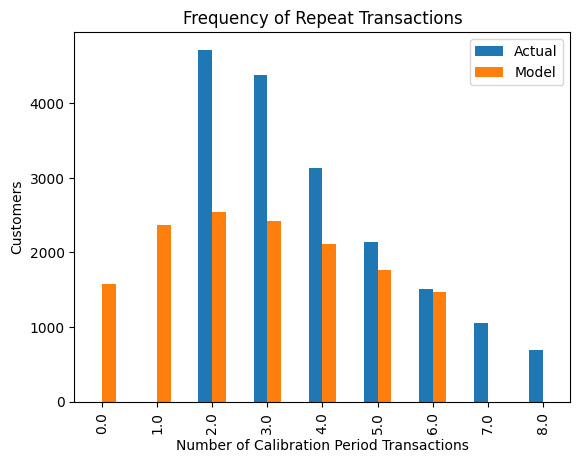

In [31]:
plot_period_transactions(bgf)
plt.show()

### Adım2: Gamma-Gamma modelini fit ediniz. Müşterilerin ortalama bırakacakları değeri tahminleyip
* exp_average_value olarak cltv dataframe'ine ekleyiniz.

In [32]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 19945 subjects, p: 4.15, q: 0.47, v: 4.08>

In [33]:
cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head()

,customer_id,recency,T,frequency,monetary,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.973927,1.947853,193.632679
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.983161,1.966323,96.665048
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.670586,1.341172,120.967619
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.700412,1.400824,67.320145
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.396039,0.792077,114.325108


### Adım3: 6 aylık CLTV hesaplayınız ve cltv ismiyle dataframe'e ekleyiniz.
* • Cltv değeri en yüksek 20 kişiyi gözlemleyiniz.

In [34]:
cltv_df["cltv"] = ggf.customer_lifetime_value (bgf,cltv_df['frequency'],cltv_df['recency'],cltv_df['T'],
                                                cltv_df['monetary'],
                                                time=6,  # 6 aylık
                                                freq="W",  # T'nin frekans bilgisi.
                                                discount_rate=0.01) 

In [35]:
cltv_df.sort_values(by="cltv",ascending=False).head()

,customer_id,recency,T,frequency,monetary,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.857143,7.857143,4.0,1401.800000,1.094385,2.188769,1449.060468,3327.777040
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.142857,13.142857,11.0,758.085455,1.970108,3.940216,767.360602,3172.394390
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.714286,101.000000,7.0,1106.467143,0.722238,1.444476,1127.611525,1708.982063
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.285714,74.571429,16.0,501.873750,1.565309,3.130618,506.166665,1662.613492
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,52.0,166.224615,4.656138,9.312276,166.712253,1628.887381


# Görev 4: CLTV Değerine Göre Segmentlerin Oluşturulması

### Adım1: 6 aylık CLTV'ye göre tüm müşterilerinizi 4 gruba (segmente) ayırınız ve grup isimlerini veri setine ekleyiniz.

In [37]:
cltv_df["segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D", "C", "B", "A"])

In [38]:
cltv_df_6month=cltv_df[["exp_sales_6_month","exp_average_value","cltv","segment"]]

In [39]:
cltv_df_6month.groupby("segment").agg(["min","max","mean"])

exp_sales_6_month                     exp_average_value               \
                      min       max      mean               min          max   
segment                                                                        
D                0.298521  2.099535  0.817792         25.082983   306.590949   
C                0.324040  3.136897  1.050896         34.788769   368.390111   
B                0.354462  3.564337  1.202210         50.597142   578.975123   
A                0.423580  9.312276  1.546054         64.983099  1449.060468   

                           cltv                           
               mean         min          max        mean  
segment                                                   
D         98.691085   12.108003   112.245389   80.340476  
C        132.250592  112.248409   165.468859  138.311508  
B        168.000578  165.469210   240.057865  199.532849  
A        238.023995  240.085432  3327.777040  362.315501

In [ ]:
cltv_df_6month.to_csv("cltv_df_6month.csv")